In [ ]:
import tensorflow as tf
import numpy as np 
import tqdm as tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Activation, Dropout, Flatten, Dense, Input, Layer
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
import pandas as pd
import cv2 as cv


In [4]:
plt.rcParams['font.size'] = 12
sns.set_style("dark")
warnings.filterwarnings('ignore')

In [ ]:
imgPath  = '/Users/mac/Documents/Chat-Bot-Telegram/DataSet/Images'
data = pd.read_csv('/Users/mac/Documents/Chat-Bot-Telegram/DataSet/captions.txt')
data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)
(224, 224, 3)


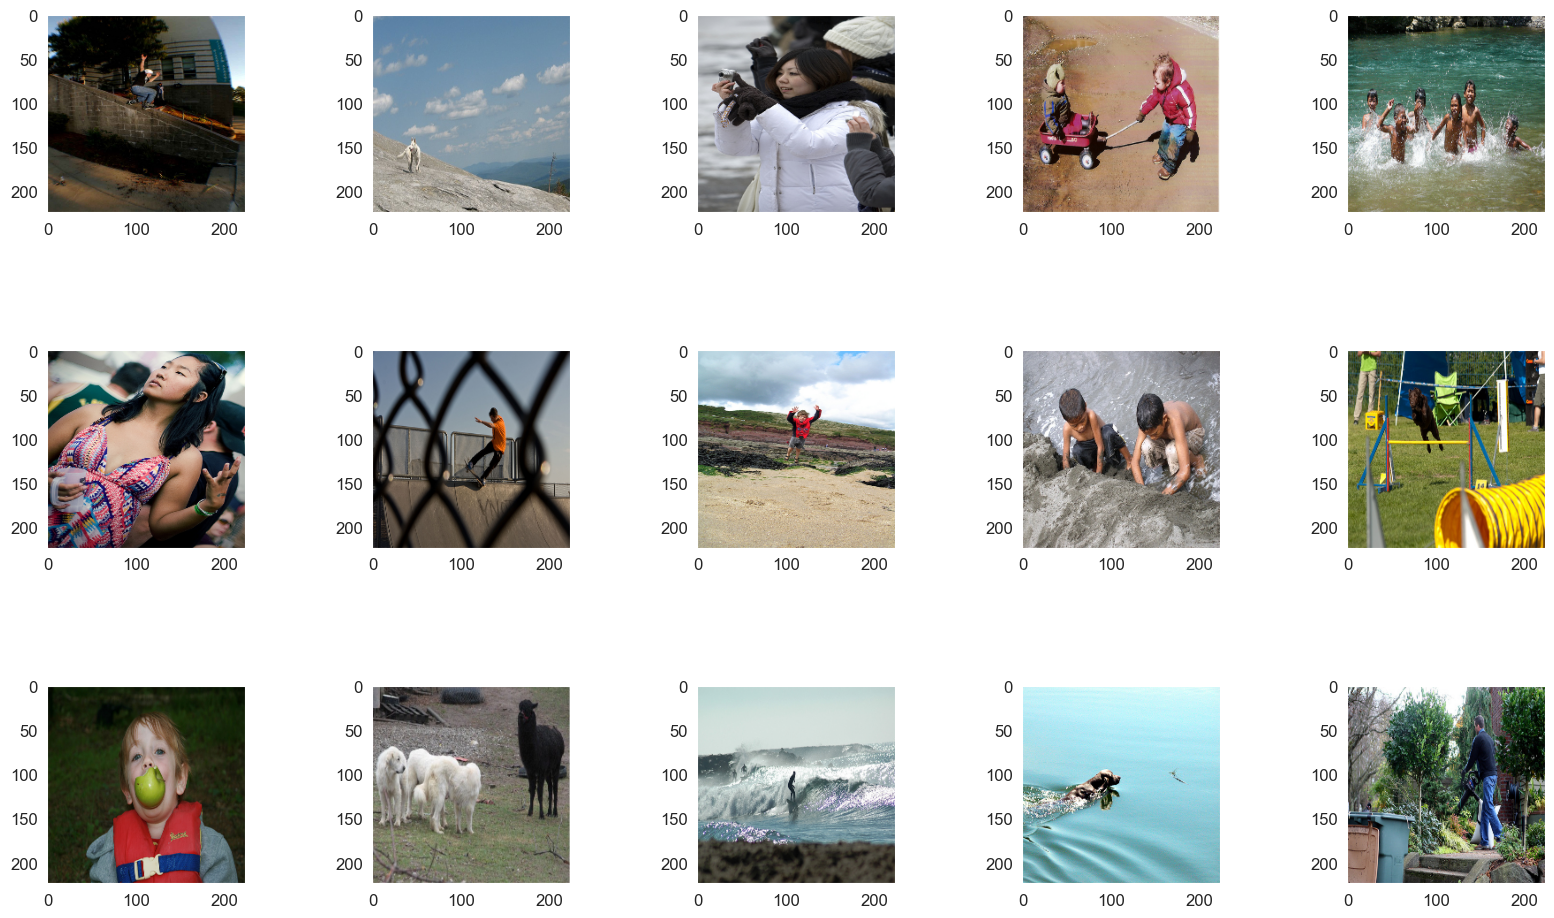

In [34]:
def read_image(imgPath):
    #img =load_img(path,color = 'rgn',target_size=(img_size,img_size))
    img = cv.imread(imgPath)
    img = cv.cvtColor(img,cv.COLOR_BGR2RGB)
    img = cv.resize(img, (224, 224)) 
    img = img / 255.0
    print(img.shape)
    return img


def display_image(temp_info):
        temp_df = temp_info.reset_index(drop = True)
        plt.figure(figsize=(20,20))
        n = 0
        for i in range(15):
            n+=1
            plt.subplot(5,5,n)
            plt.subplots_adjust(hspace= 0.7,wspace=0.3)
            img_name = temp_df['image'][i] 
            imgPath  = f"/Users/mac/Documents/Chat-Bot-Telegram/DataSet/Images/{img_name}"
            img = read_image(imgPath)

            plt.imshow(img)
display_image(data.sample(15))    